# Tutorial 8-2. Sentiment Analysis
**GOAL**: Develop a sentiment classifier that determines the sentiment of documents as positive or negative.

### 0. Installation

Before starting this tutorial, please be prepared by installing the two packages.
- `wordcloud` package

You can install them by running the following lines:
```
>> pip install wordcloud
```

For details, see slides.

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


**Got error message?** 

Try below! (restarting Jupyter may be required)

In [16]:
pip install --upgrade Pillow --user

  Using cached https://files.pythonhosted.org/packages/cb/3c/4f3ef1a14e903d7b2bc43672c20f732b874e1e50a9a58ac9a1726ef3773d/Pillow-9.5.0-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


## 1. (English) Yelp review classification

### 1-1. Load dataset

The datafile `yelp.csv` contains 10,000 reviews and its metadata (e.g., date, stars, user_id, business_id).

Seeing is better than words. Let's load the data.

In [1]:
import pandas as pd

df = pd.read_csv('yelp.csv')
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


Only `text` and `stars` columns will be used for sentiment analysis. Drop the other columns.

In [2]:
df = df.drop(['business_id', 'date', 'review_id', 'type', 'user_id', 'cool', 'useful', 'funny'], axis=1)

In [3]:
df.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


Check the distribution of rating.

<AxesSubplot:ylabel='Frequency'>

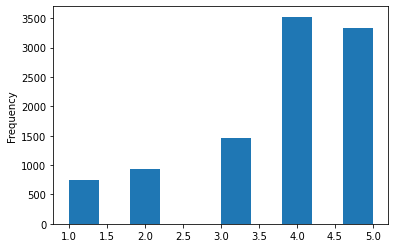

In [4]:
df.stars.plot.hist()

We will label rewiews with stars 4 or 5 as `positive` (class=1) and reviews with stars 1 or 2 as `negative` (class=0).

In [5]:
df = df[df['stars'] != 3] # delete reviews having stars=3
df['sentiment'] = df['stars'].apply(lambda x: 1 if x > 3 else 0)

In [6]:
df

,stars,text,sentiment
0,5,My wife took me here on my birthday for breakf...,1
1,5,I have no idea why some people give bad review...,1
2,4,love the gyro plate. Rice is so good and I als...,1
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1
4,5,General Manager Scott Petello is a good egg!!!...,1
...,...,...,...
9994,5,Let's see...what is there NOT to like about Su...,1
9996,4,Should be called house of deliciousness!\n\nI ...,1
9997,4,I recently visited Olive and Ivy for business ...,1
9998,2,My nephew just moved to Scottsdale recently so...,0


Word cloud visualization for text reviews

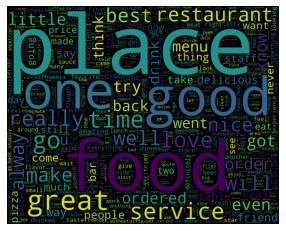

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df.text.values) # all text documents in one string
wc = WordCloud(width=1000, height=800, max_words=1000).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

### 1-2. Document vectorization

We will use our friend `sklearn` package for machine learning to transform text into BOW (bag-of-words) vectors.

We have two options:
- `CountVectorizer`: return vectors having term frequencies (docuemnt [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html))
- `TfidfVectorizer`: return vectors having Tf-Idf (term frequency-inverse docuement frequency) values (document [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html))

The code below will extract the top 1000 frequent tokens consisting of unigrams and bigrams. Stopwords are removed using the predefined stopwords likst in the `sklearn` package.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = CountVectorizer(max_features=1000, # select top 1000 frequent tokens
                             ngram_range=(1, 2), # use unigram and bigram
                             lowercase=True, # lowercase input text
                             stop_words='english') # remove predefined stop words for English
X_counts = count_vect.fit_transform(df['text'])

tfidf_vect = TfidfVectorizer(max_features=1000, # select top 1000 frequent tokens
                             ngram_range=(1, 2), # use unigram and bigram
                             lowercase=True, # convert all characters to lowercase before tokenizing
                             stop_words='english') # remove predefined stop words for English
X_tfidfs = tfidf_vect.fit_transform(df['text'])

X_counts.shape, X_tfidfs.shape

((8539, 1000), (8539, 1000))

Let's check the resulting matrix!

In [9]:
X_counts, X_tfidfs

(<8539x1000 sparse matrix of type '<class 'numpy.int64'>'
 	with 275700 stored elements in Compressed Sparse Row format>,
 <8539x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 275700 stored elements in Compressed Sparse Row format>)

Let's make them visible using pandas dataframe!
- The resulting `X_counts` and `X_tfidfs` are sparse matrices (designed for memory efficiency) with no direct access to their values. To see their values, we have to use the `.todense()` method.
- For the vectorizers, use `.get_feature_names()` method to check the extracted tokens.

In [10]:
df_bow_tf = pd.DataFrame(X_counts.todense(), columns=count_vect.get_feature_names())
df_bow_tf

C:\Users\CAU\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,10,100,11,12,15,20,25,30,40,...,wrong,yeah,year,years,yelp,yes,yogurt,young,yum,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8534,0,1,0,0,0,1,0,1,1,0,...,0,0,2,0,0,0,0,0,0,0
8535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_bow_tfidf = pd.DataFrame(X_tfidfs.todense(), columns=tfidf_vect.get_feature_names())
df_bow_tfidf

C:\Users\CAU\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,10,100,11,12,15,20,25,30,40,...,wrong,yeah,year,years,yelp,yes,yogurt,young,yum,yummy
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.113564,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8534,0.0,0.068843,0.0,0.000000,0.0,0.083419,0.0,0.095147,0.080826,0.0,...,0.0,0.0,0.156424,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
8535,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
8536,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.07541,0.0,0.0,0.0,0.0,0.0,0.0
8537,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


We are ready to develop machine learning models for sentiment classification!

### 1-3. Develop sentiment classifiers

Here, we will develop a logistic regression, especially, Lasso!

In [12]:
X = df_bow_tfidf
y = df.sentiment
X.shape, y.shape

((8539, 1000), (8539,))

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# data split
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
X_trn.shape, X_tst.shape, y_trn.shape, y_tst.shape

# model training: Lasso (l1 penalty)
clf = LogisticRegression(penalty='l1', solver='saga', C=10, random_state=0)
clf.fit(X_trn, y_trn)

# model evaluation
y_trn_pred = clf.predict(X_trn)
acc = accuracy_score(y_trn, y_trn_pred)
f1 = f1_score(y_trn, y_trn_pred)
print('Training Accuracy: {:.4f}, Fscore: {:.4f}'.format(acc, f1))
y_tst_pred = clf.predict(X_tst)
acc = accuracy_score(y_tst, y_tst_pred)
f1 = f1_score(y_tst, y_tst_pred)
print('Test Accuracy: {:.4f}, Fscore: {:.4f}'.format(acc, f1))

Training Accuracy: 0.9620, Fscore: 0.9765
Test Accuracy: 0.8899, Fscore: 0.9321


C:\Users\CAU\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


It works pretty well, showing a high f1 score!

Let's check the positive or negative sentiment words.

In [14]:
import numpy as np

# coefficient values and their corresponding feature names
coefficient_values = clf.coef_.squeeze()
feature_names = X.columns

# get index to access the values in ascending order
args = np.argsort(coefficient_values)

In [15]:
print('top 10 negative words:')
for token, coef in zip(feature_names[args[:10]], coefficient_values[args[:10]]):
    print('{:<20}: {:.4f}'.format(token, coef))

top 10 negative words:
bland               : -16.3376
overpriced          : -16.1787
worst               : -14.6233
horrible            : -12.7688
rude                : -11.9562
poor                : -11.1253
wait staff          : -10.9950
okay                : -9.8193
gross               : -9.5378
tasted like         : -9.0886


In [16]:
print('top 10 positive words:')
for token, coef in zip(feature_names[args[-10:][::-1]], coefficient_values[args[-10:]][::-1]): # [::-1] for reversing the order
    print('{:>20}: {:.4f}'.format(token, coef))

top 10 positive words:
             perfect: 25.2771
               great: 17.1120
           excellent: 16.5403
               mouth: 14.5933
                beat: 14.5059
             vanilla: 14.4429
             awesome: 13.8311
         comfortable: 13.3738
           fantastic: 13.1725
           authentic: 12.9672


## 2. How about for Korean documents?

`CountVectorizer` and `TfidfVectorizer` are powerful tools to convert free text documents to vectors.

However, their NLP such as tokenization or stopwords removal is only for English.

Thus, for Korean documents, we need to use **a custom tokenizer function designed for Korean**.

In [17]:
from konlpy.tag import Okt

def okt_tokenizer(text, return_nouns_only=True):
    """ 
    input: korean text
    output: tokens
    
    if return_nouns_only option is True, only nouns will be extracted.
    """
    okt = Okt()
    
    if return_nouns_only:
        tokens = okt.nouns(text)
    else:
        tokens = okt.morphs(text)
    
    # you can refer to the site below that lists Korean stopwords
    # https://www.ranks.nl/stopwords/korean
    stopwords = ['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽', ]
    tokens = [n for n in tokens if n not in stopwords]
    return tokens

In [18]:
corpus = [
    '아 더빙.. 진짜 짜증나네요 목소리',
    '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
    '너무재밓었다그래서보는것을추천한다',
    '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
    '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
    '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
    '원작의 긴장감을 제대로 살려내지못했다.',
    '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
    '액션이 없는데도 재미 있는 몇안되는 영화']

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=okt_tokenizer)
X = vectorizer.fit_transform(corpus)
df_X = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
df_X

C:\Users\CAU\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,가족,감금,걸음,교도소,구먼,그것,긴장감,길용우,납치,네,...,진짜,초등학교,초딩,추천,커스틴,평점,포스터,학년,해도,흠
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.379041,0.000000,0.000000,0.000000,0.379041,0.000000,0.000000,0.379041
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.418363,0.418363,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.418363,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.409605,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.330872,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.330872,0.000000,0.000000,0.000000,0.000000,0.000000,0.330872,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.216917,0.216917,0.000000,0.000000,0.000000,0.216917,0.00000,0.216917,0.216917,0.216917,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.216917,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Word cloud visualization for Korean
- To visualize Korean, We will use a custom font file (`NanumSquareRoundR.ttf`) since the basic font in `WordCloud` package do not support Korean.
    - Be sure to locate `NanumSquareRoundR.ttf` file in the same folder.

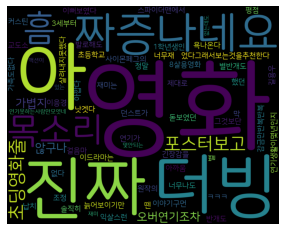

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(corpus) # all text documents in one string
wc = WordCloud(font_path='NanumSquareRoundR.ttf', width=1000, height=800, max_words=1000).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

I also recommend to use online wordcloud generor (e.g., http://wordcloud.kr/) for convenience :)